<a href="https://colab.research.google.com/github/kundajelab/pho4/blob/master/TFMoDIScoISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function, division
%matplotlib inline

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [2]:
!pip install modisco

     |████████████████████████████████| 163kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/15/6f/5d/ae1f04fd16037b993dd01a2f76769c2a22e3ccf1ee063803fc
Successfully built modisco


In [3]:
import numpy as np
import modisco
import sys
print (sys.version)
import os

TF-MoDISco is using the TensorFlow backend.


3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


Grab input data (ISM scores)

In [4]:
![[ -f ISM_logcount_motifs.h5 ]] || wget http://mitra.stanford.edu/kundaje/eileenli/ISM_logcount_motifs.h5 -O ISM_logcount_motifs.h5

--2019-07-16 16:34:01--  http://mitra.stanford.edu/kundaje/eileenli/ISM_logcount_motifs.h5
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33235896 (32M)
Saving to: ‘ISM_logcount_motifs.h5’

ISM_logcount_motifs 100%[===================>]  31.70M  11.7MB/s    in 2.7s    

2019-07-16 16:34:04 (11.7 MB/s) - ‘ISM_logcount_motifs.h5’ saved [33235896/33235896]



In [5]:
![[ -f ISM_profile_motifs.h5 ]] || wget http://mitra.stanford.edu/kundaje/eileenli/ISM_profile_motifs.h5 -O ISM_profile_motifs.h5

--2019-07-16 16:34:05--  http://mitra.stanford.edu/kundaje/eileenli/ISM_profile_motifs.h5
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33235896 (32M)
Saving to: ‘ISM_profile_motifs.h5’

ISM_profile_motifs. 100%[===================>]  31.70M  9.09MB/s    in 3.7s    

2019-07-16 16:34:09 (8.61 MB/s) - ‘ISM_profile_motifs.h5’ saved [33235896/33235896]



In [6]:
# get sacCer3 genome
![[ -f sacCer3.2bit ]] || wget http://hgdownload.cse.ucsc.edu/goldenPath/sacCer3/bigZips/sacCer3.2bit -O sacCer3.2bit
# get motif locations
![[ -f 1000_around_pho4.bed.gz ]] || wget http://mitra.stanford.edu/kundaje/eileenli/1000_around_pho4.bed.gz -O 1000_around_pho4.bed.gz

--2019-07-16 16:34:10--  http://hgdownload.cse.ucsc.edu/goldenPath/sacCer3/bigZips/sacCer3.2bit
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3039745 (2.9M) [text/plain]
Saving to: ‘sacCer3.2bit’

sacCer3.2bit        100%[===================>]   2.90M   837KB/s    in 3.5s    

2019-07-16 16:34:14 (837 KB/s) - ‘sacCer3.2bit’ saved [3039745/3039745]

--2019-07-16 16:34:15--  http://mitra.stanford.edu/kundaje/eileenli/1000_around_pho4.bed.gz
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7747 (7.6K) [application/x-gzip]
Saving to: ‘1000_around_pho4.bed.gz’

1000_around_pho4.be 100%[===================>]   7.57K  --.-KB/s    in 0s      

2019-07-16 

In [7]:
![[ -f 1000_around_pho4_onehot.npy ]] || wget http://mitra.stanford.edu/kundaje/eileenli/1000_around_pho4_onehot.npy -O 1000_around_pho4_onehot.npy

--2019-07-16 16:34:16--  http://mitra.stanford.edu/kundaje/eileenli/1000_around_pho4_onehot.npy
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16616000 (16M)
Saving to: ‘1000_around_pho4_onehot.npy’

1000_around_pho4_on 100%[===================>]  15.85M  9.28MB/s    in 1.7s    

2019-07-16 16:34:18 (9.28 MB/s) - ‘1000_around_pho4_onehot.npy’ saved [16616000/16616000]



In [0]:
import numpy as np
pho4_onehot = np.load("1000_around_pho4_onehot.npy")

Functions for one-hot encoding sequences

In [0]:
import gzip

def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1

Prepare data for input into MoDISco. Need numpy array of importance scores and hypothetical importance scores.

In [0]:
import h5py
from collections import OrderedDict

task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()

f = h5py.File("ISM_profile_motifs.h5","r")

In [86]:
list(f.keys())

['contrib_scores', 'hyp_contrib_scores']

In [0]:
dset = f['contrib_scores']

In [31]:
list(dset.keys())

['one hot masked ISM']

In [0]:
dset2 = dset['one hot masked ISM']

In [33]:
dset2.shape

(951, 546, 4)

In [0]:
#Note that the sequences can be of variable lengths;
#in this example they all have the same length (200bp) but that is
#not necessary.
task_to_scores['task0'] = [np.array(x) for x in f['contrib_scores']['one hot masked ISM']]
task_to_hyp_scores['task0'] = [np.array(x) for x in f['hyp_contrib_scores']['mean normalized ISM all bases']]

#onehot_data = [one_hot_encode_along_channel_axis(seq) for seq in pho4_onehot]

In [88]:
np.array(onehot_data).shape

(951, 1000, 4)

In [63]:
(pho4_onehot[0])

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [0]:
pho4_onehot_data = np.array(pho4_onehot).astype("int8")

In [62]:
(onehot_data[0])

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0]], dtype=int8)

In [35]:
print(task_to_scores[0])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.38418579e-07]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.19209290e-06]
 ...
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  9.53674316e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


Double check by plotting

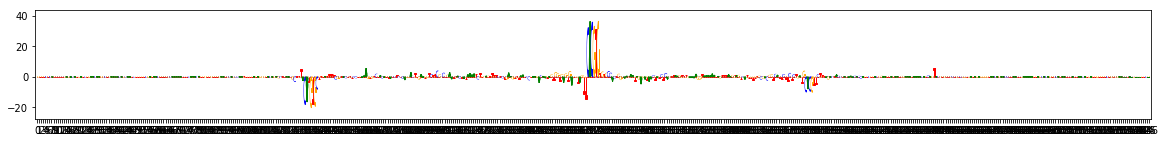

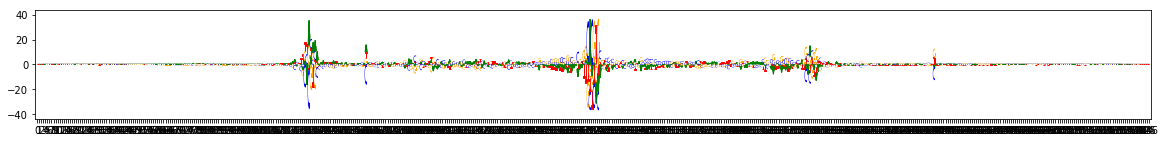

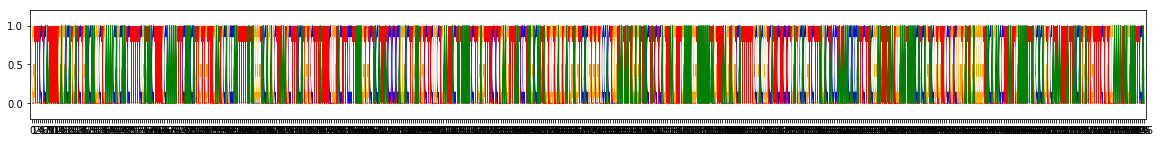

In [12]:
import modisco.visualization
from modisco.visualization import viz_sequence

viz_sequence.plot_weights(task_to_scores['task0'][0])
viz_sequence.plot_weights(task_to_hyp_scores['task0'][0])
viz_sequence.plot_weights(pho4_onehot[0])

Run TF-MoDISCO

On task task0
Computing windowed sums on original
Generating null dist


TF-MoDISco is using the TensorFlow backend.


peak(mu)= 0.00045732879638682444
Computing threshold
Thresholds from null dist were -0.296661376953125  and  1.1707534790039062
Passing windows frac was 0.6510973806756639 , which is above  0.2 ; adjusting
Final raw thresholds are -9.283311462402352  and  9.283311462402352
Final transformed thresholds are -0.799998814069875  and  0.799998814069875


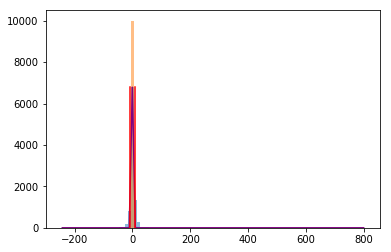

Got 9449 coords
After resolving overlaps, got 9449 seqlets
Across all tasks, the weakest transformed threshold used was: 0.7999987140698751
9449 identified in total
Reducing weak_threshold_for_counting_sign to match weakest_transformed_thresh, from 0.8 to 0.7999987140698751
2 activity patterns with support >= 100 out of 3 possible patterns
Metacluster sizes:  [6019, 3430]
Idx to activities:  {0: '1', 1: '-1'}
On metacluster 1
Metacluster size 3430
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)


W0716 16:36:02.010868 140073772455808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/modisco/backend/tensorflow_backend.py:87: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 3430
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings


Using TensorFlow backend.
W0716 16:36:02.952117 140073772455808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0716 16:36:02.953457 140073772455808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0716 16:36:02.954751 140073772455808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0716 16:36:02.989233 140073772455808 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Finished embedding computation in 2.17 s
Starting affinity matrix computations
Normalization computed in 0.04 s
Cosine similarity mat computed in 0.51 s
Normalization computed in 0.03 s
Cosine similarity mat computed in 0.52 s
Finished affinity matrix computations in 1.04 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.48 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 113.04 s
Launching nearest neighbors affmat calculation job
Job completed in: 102.91 s
(Round 1) Computed affinity matrix on nearest neighbors in 248.2 s
Filtered down to 2080 of 3430
(Round 1) Retained 2080 rows out of 3430 after filtering
(Round 1) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2080 samples in 0.005s...
[t-SNE] Computed neighbors for 2080 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2080
[t-SNE] Computed

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    9.4s finished


Louvain completed 200 runs in 13.63500189781189 seconds
Wrote graph to binary file in 5.879190444946289 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.577439
After 3 runs, maximum modularity is Q = 0.579895
After 31 runs, maximum modularity is Q = 0.584946
Louvain completed 81 runs in 11.70362901687622 seconds
Preproc + Louvain took 32.26300573348999 s
Got 10 clusters after round 1
Counts:
{6: 95, 5: 99, 4: 238, 2: 280, 3: 249, 0: 648, 7: 75, 9: 38, 1: 320, 8: 38}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 648 seqlets
Trimmed 155 out of 648
Dropping cluster 0 with 493 seqlets due to sign disagreement
Aggregating for cluster 1 with 320 seqlets
Trimmed 42 out of 320
Dropping cluster 1 with 277 seqlets due to sign disagreement
Aggregating for cluster 2 with 280 seqlets
Trimmed 17 out of 280
Aggregating for cluster 3 with 249 seqlets
Trimmed 12 out of 249
Aggregating for cluster 4 with 238 seqlets
Trimmed 3 out of

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    5.4s finished


Louvain completed 200 runs in 5.872051000595093 seconds
Wrote graph to binary file in 0.7655925750732422 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.767897
After 3 runs, maximum modularity is Q = 0.78718
After 34 runs, maximum modularity is Q = 0.790374
Louvain completed 84 runs in 7.2300145626068115 seconds
Preproc + Louvain took 14.100414514541626 s
Got 12 clusters after round 2
Counts:
{0: 157, 10: 16, 7: 41, 9: 23, 4: 63, 2: 88, 6: 41, 1: 142, 3: 72, 5: 59, 11: 10, 8: 25}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 157 seqlets
Trimmed 6 out of 157
Aggregating for cluster 1 with 142 seqlets
Trimmed 25 out of 142
Aggregating for cluster 2 with 88 seqlets
Trimmed 23 out of 88
Aggregating for cluster 3 with 72 seqlets
Trimmed 4 out of 72
Aggregating for cluster 4 with 63 seqlets
Trimmed 13 out of 63
Aggregating for cluster 5 with 59 seqlets
Trimmed 9 out of 59
Aggregating for cluster 6 with 41 seqlets
Trimme

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   13.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   14.3s finished


Louvain completed 200 runs in 24.054093837738037 seconds
Wrote graph to binary file in 15.236632585525513 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.662034
After 2 runs, maximum modularity is Q = 0.672205
After 4 runs, maximum modularity is Q = 0.686
Louvain completed 54 runs in 16.7469220161438 seconds
Preproc + Louvain took 57.72760057449341 s
Got 12 clusters after round 1
Counts:
{4: 259, 2: 462, 8: 151, 3: 389, 9: 137, 6: 169, 0: 630, 1: 584, 5: 218, 10: 49, 7: 161, 11: 34}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 630 seqlets
Trimmed 104 out of 630
Aggregating for cluster 1 with 584 seqlets
Trimmed 91 out of 584
Aggregating for cluster 2 with 462 seqlets
Trimmed 7 out of 462
Aggregating for cluster 3 with 389 seqlets
Trimmed 51 out of 389
Aggregating for cluster 4 with 259 seqlets
Trimmed 5 out of 259
Aggregating for cluster 5 with 218 seqlets
Trimmed 4 out of 218
Aggregating for cluster 6 with 169 s

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   11.8s finished


Louvain completed 200 runs in 17.703749895095825 seconds
Wrote graph to binary file in 9.121755838394165 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.650384
Louvain completed 51 runs in 12.774969577789307 seconds
Preproc + Louvain took 41.0804660320282 s
Got 14 clusters after round 2
Counts:
{0: 568, 12: 48, 1: 416, 11: 55, 8: 104, 10: 77, 6: 171, 5: 186, 2: 300, 4: 194, 7: 132, 3: 258, 9: 86, 13: 16}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 568 seqlets
Trimmed 95 out of 568
Aggregating for cluster 1 with 416 seqlets
Trimmed 38 out of 416
Aggregating for cluster 2 with 300 seqlets
Trimmed 41 out of 300
Aggregating for cluster 3 with 258 seqlets
Trimmed 52 out of 258
Aggregating for cluster 4 with 194 seqlets
Trimmed 33 out of 194
Aggregating for cluster 5 with 186 seqlets
Trimmed 16 out of 186
Aggregating for cluster 6 with 171 seqlets
Trimmed 9 out of 171
Aggregating for cluster 7 with 132 seqlets
Trimmed

In [14]:
import h5py
import numpy as np
%matplotlib inline
import modisco
reload(modisco)
import modisco.backend
reload(modisco.backend.tensorflow_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat.core)
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.cluster
reload(modisco.cluster.core)
reload(modisco.cluster.phenograph.core)
reload(modisco.cluster.phenograph.cluster)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    #Slight modifications from the default settings
                    sliding_window_size=15,
                    flank_size=5,
                    target_seqlet_fdr=0.15,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        trim_to_window_size=15,
                        initial_flank_to_add=5,
                        kmer_len=5, num_gaps=1,
                        num_mismatches=0,
                        final_min_cluster_size=60)
                )(task_names=["task0"],
                contrib_scores=task_to_scores,
                hypothetical_contribs=task_to_hyp_scores,
                one_hot=pho4_onehot)

Save and print results

In [0]:
import h5py
import modisco.util
reload(modisco.util)

grp1 = h5py.File("ISM_profile_motifs_results.hdf5")
tfmodisco_results.save_hdf5(grp1)

Metaclusters heatmap


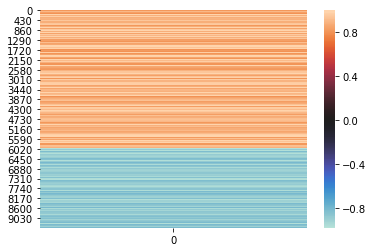

In [19]:
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("ISM_profile_motifs_results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 651
Task 0 hypothetical scores:


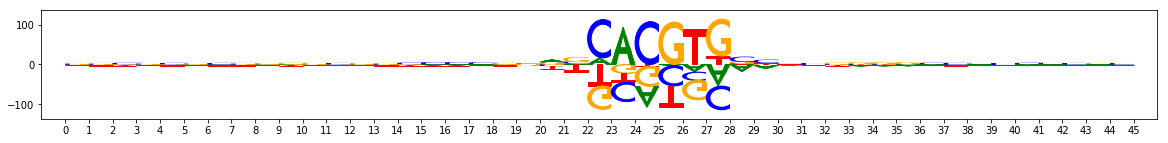

Task 0 actual importance scores:


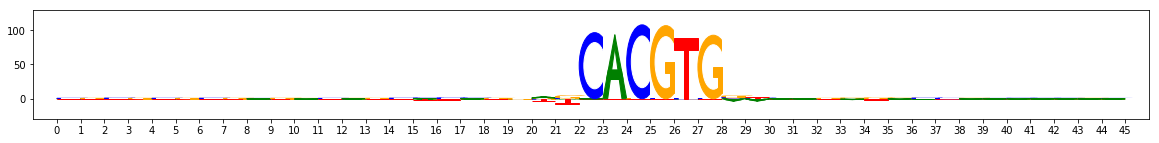

onehot, fwd and rev:


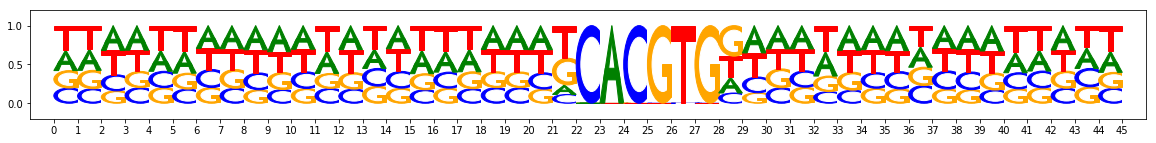

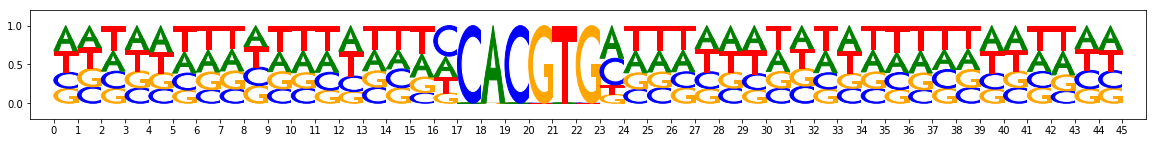

metacluster_0 pattern_1
total seqlets: 489
Task 0 hypothetical scores:


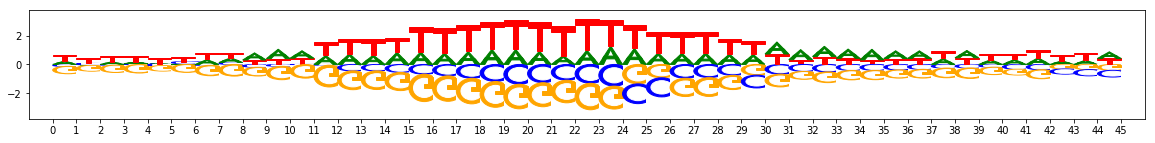

Task 0 actual importance scores:


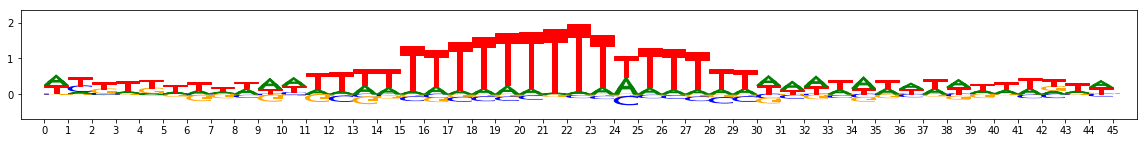

onehot, fwd and rev:


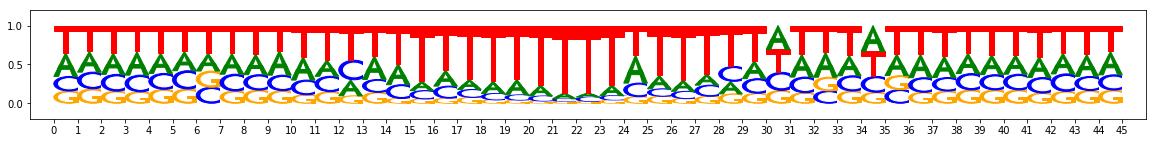

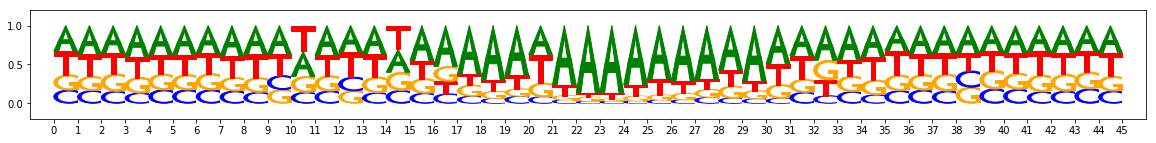

metacluster_0 pattern_2
total seqlets: 215
Task 0 hypothetical scores:


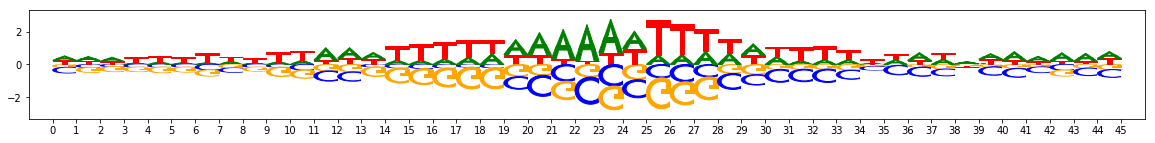

Task 0 actual importance scores:


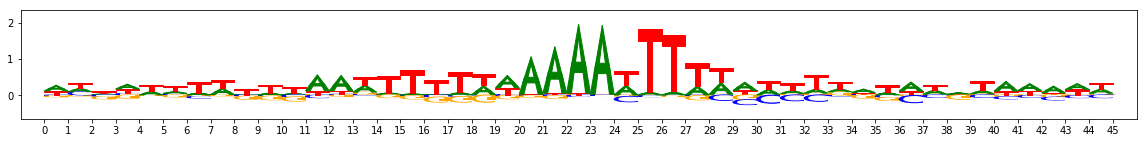

onehot, fwd and rev:


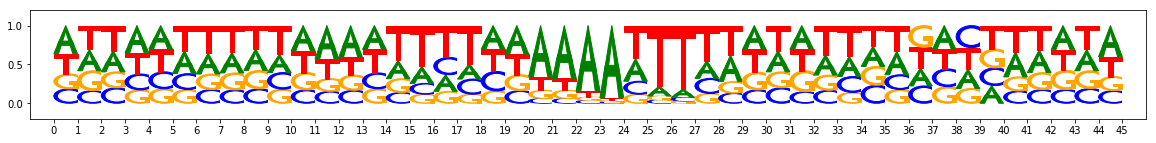

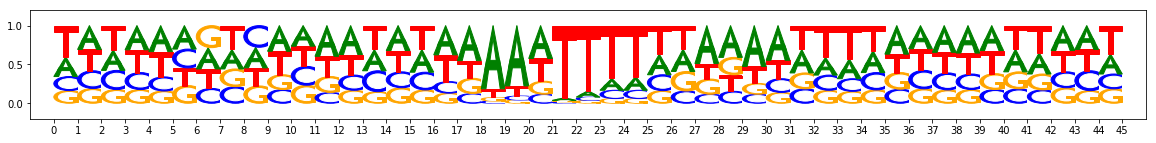

metacluster_0 pattern_3
total seqlets: 196
Task 0 hypothetical scores:


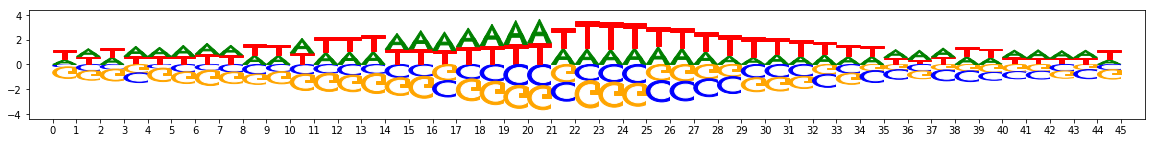

Task 0 actual importance scores:


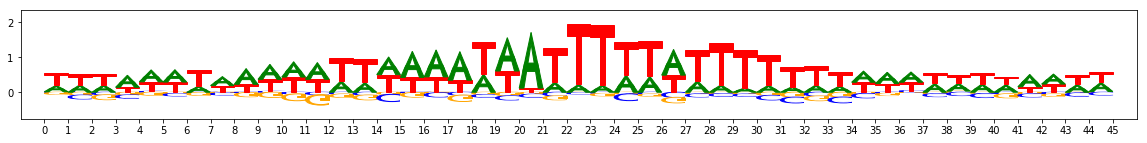

onehot, fwd and rev:


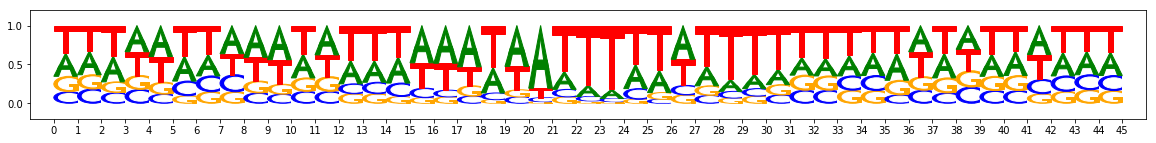

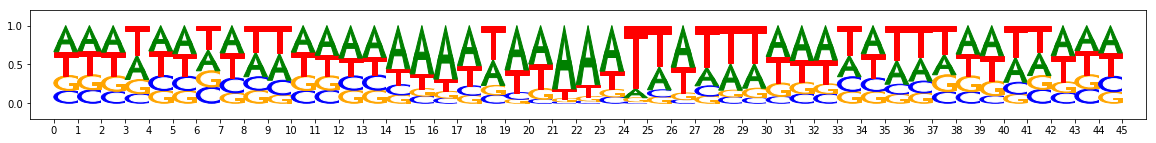

metacluster_0 pattern_4
total seqlets: 187
Task 0 hypothetical scores:


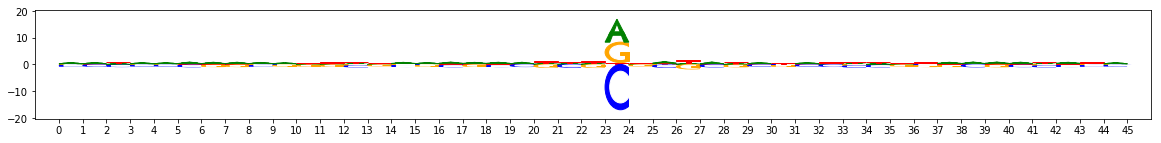

Task 0 actual importance scores:


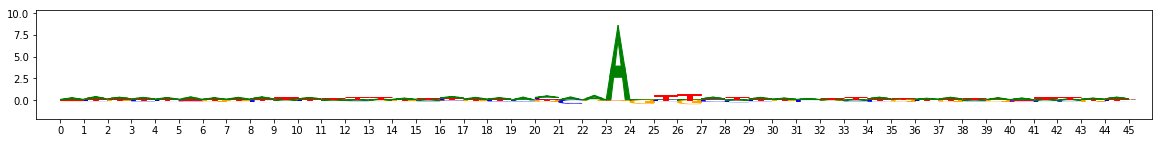

onehot, fwd and rev:


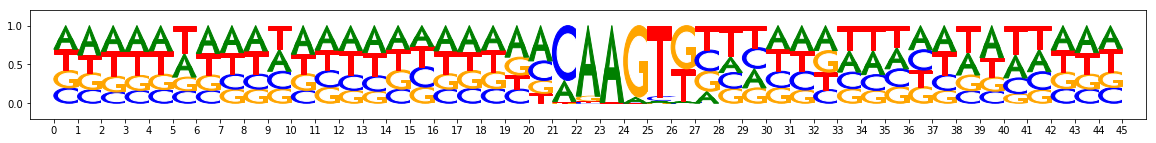

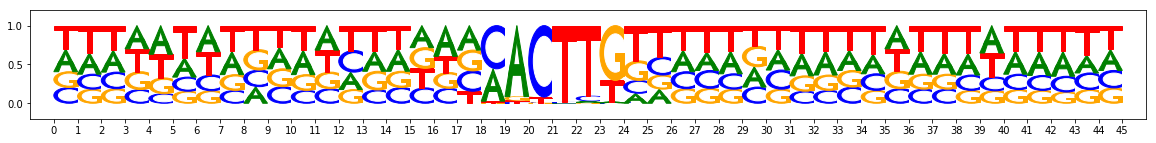

metacluster_0 pattern_5
total seqlets: 77
Task 0 hypothetical scores:


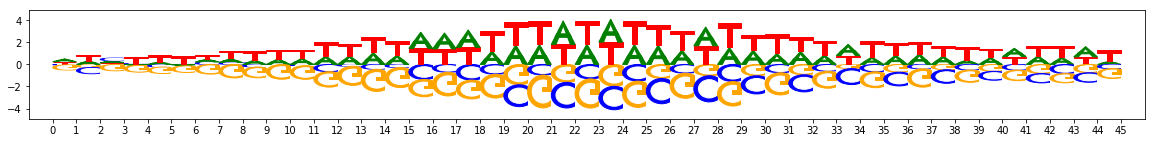

Task 0 actual importance scores:


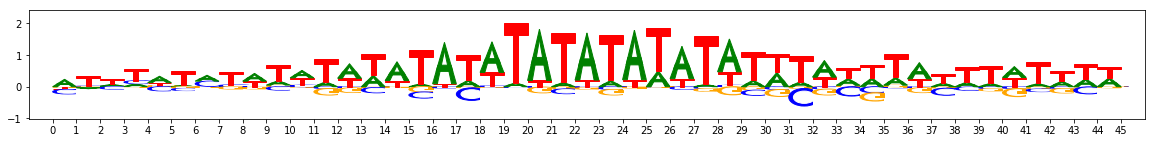

onehot, fwd and rev:


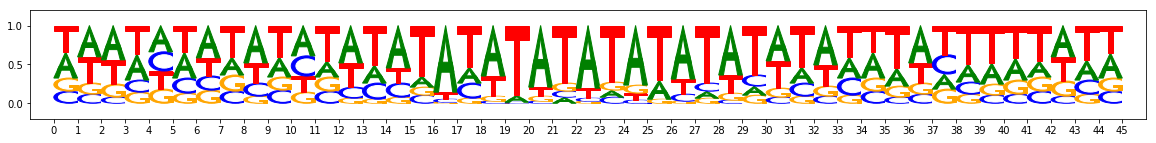

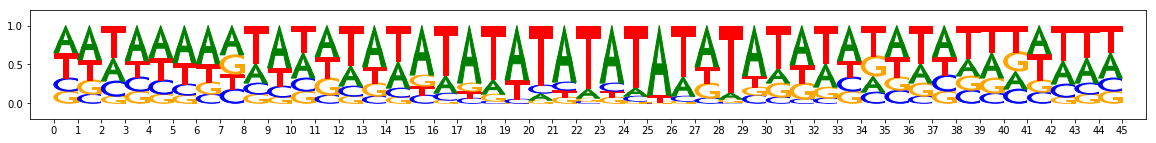

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 579
Task 0 hypothetical scores:


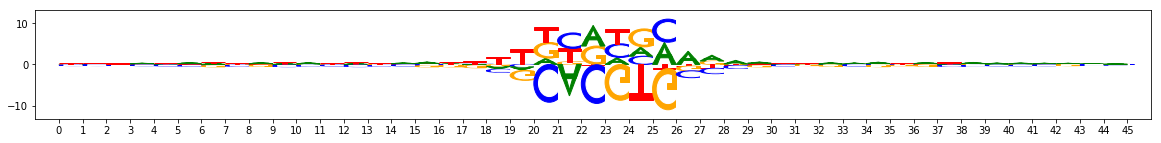

Task 0 actual importance scores:


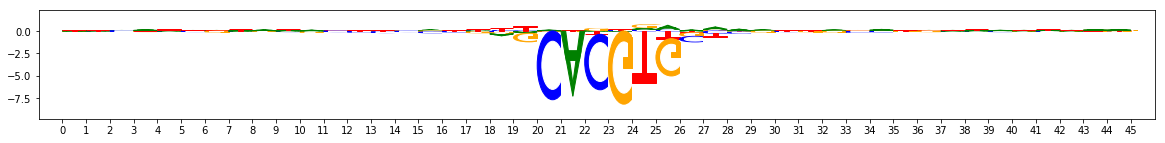

onehot, fwd and rev:


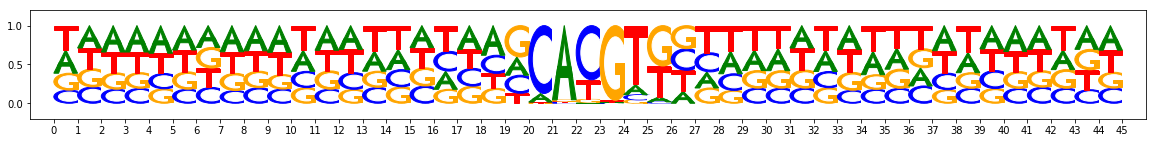

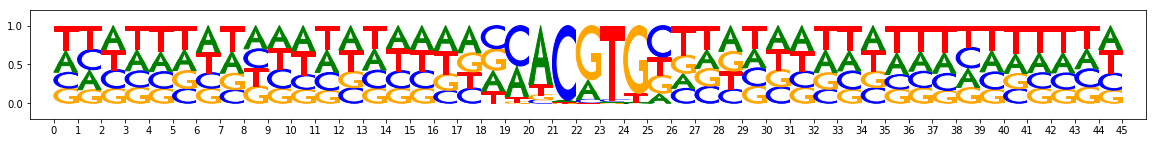

In [17]:
for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights((np.array(pattern["sequence"]["fwd"]))) 
        viz_sequence.plot_weights((np.array(pattern["sequence"]["rev"]))) 
        
hdf5_results.close()

In [20]:
metacluster_name = 'metacluster_1'
pattern_name = 'pattern_0'

metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"][metacluster_name])
print("activity pattern:",metacluster_grp["activity_pattern"][:])
all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
if (len(all_pattern_names)==0):
  print("No motifs found for this activity pattern")

print(metacluster_name, pattern_name)
pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))

activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 579


In [0]:
dset = pattern["seqlets_and_alnmts"]["seqlets"]

In [82]:
np.array(pho4_onehot).shape

(951, 546, 4)

In [83]:
!cat neg_motif_score_sequences

AGCATCATAGCTATCATCACACATGTCTACTAGTTTCCACGTATG
TTTCCACACCGTACGTGAGCACATGTCTGGATTGCTAGCTGCGTA
TGACCAATTTGATAATTTGGCATGTGCGATCTCTTCGAAAACAGG
GACGATATCACTCTTGAGCGCATGTGCCGTTTCCGAGAACGCCAG
ATCTGCGCCGTTCAGGGGTCCATGTGCCTTGGACGATATTAAGGC
TCAACACACCCGTACACCACCATGTGCGTTATTGAAAAACTCACG
GGTGATATACTCTTTGGTGCACATGCAGGGATGGTTCCGGGAGAC
GTACAGAGCTTAATGCTTTACATGTGCTTTATTTTCGGTACTTTC
CACAGCTGGTGTCTCGTCGCACATGCTATTGTGTGTCATCGGGCC
ATCATTCTGGACGTATGTGCACATGTGATTTGCTTTTGTTTTTTT
ACGGATTTACACTAATTAACACATGGCCAATATAGGTATAAATAA
ACGAATACAGATAGATGGGCACATGGCAAACTTAGCTCAGTATGG
AGCTGAGCCAGAAAATATACCATGTGTGACAATAGCGATAACCTC
GTAGAAACACCAAAATAAGCCATGTGCTTACATAGTGAACATAGT
CGGTACTGTTCTCTGTAATGCATGTGGCCTCTTCCTGAAGTTGCA
TTTTGGAATAGTAGATTAAGCATGTGATAAGTGCCAGTGAAAAAA
TTTTTTTTTTCGTTATGAACCCTGTGCCCGAGGGGTTTTCAGGCA
CATTTGCCACGGCATGTCAACAGGTGAGTGCCTTTTGAGGGGGGG
GCAGCGTGAATGGCACGGCCACATGGGTGGGATTACCCGCGCAGC
TGAAACTTCTAAATCGGCGTCATGTGAAAAACGAGTTAAGGTATC
GCAGCGTGAATGGCACGGCCACATGGGTGGGATTACCCGCGCAGC
AAAGATTGATCTCTATGGGCATATGTTCCTTTCC

In [37]:
dset[0]

b'example:525,start:157,end:202,rc:True'

In [35]:
dset[0]

b'example:525,start:157,end:202,rc:True'

In [30]:
import modisco.coordproducers
reload(modisco.coordproducers)

import modisco.aggregator
reload(modisco.aggregator)

<module 'modisco.aggregator' from '/usr/local/lib/python3.6/dist-packages/modisco/aggregator.py'>

In [0]:
array = dset[0].decode("utf-8").split(':')

In [0]:
from itertools import *

In [0]:
import numpy as np

def one_hot_to_base(one_hot):
  seq_string = ""
  for entry in one_hot:
    if (np.array_equal(entry,[1,0,0,0])):
        seq_string+="A"
    if (np.array_equal(entry,[0,1,0,0])):
        seq_string+="C"
    if (np.array_equal(entry,[0,0,1,0])):
        seq_string+="G"
    if (np.array_equal(entry,[0,0,0,1])):
        seq_string+="T"
  return seq_string

In [0]:
def getValsFromString(string_arr):
  nums = []
  for entry in string_array:
    test = "".join(takewhile(str.isnumeric,entry))
    if test!="":
      nums.append(test)
  return nums

In [62]:
pho4_onehot[0][50:60]

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [0]:
seq_strings = []
seq_strings_full = []
seq_onehot = []
vals = []
for entry in dset:
  string_array = entry.decode("utf-8").split(':')
  values = getValsFromString(string_array)
  example_num = int(values[0])
  start = int(values[1])
  end = int(values[2])
  vals.append((example_num,start,end))
  seq_onehot.append(pho4_onehot[example_num][start:end])
  seq_strings.append(one_hot_to_base(pho4_onehot[example_num][start:end]))
  seq_strings_full.append(one_hot_to_base(pho4_onehot[example_num]))

In [0]:
def get_inputs_iterator_from_batchmaker(batchmaker, input_names):
    for a_batch in batchmaker:
        batch_as_list = [a_batch[0][x] for x in input_names]
        batch_as_list = [x if len(x.shape) > 1 else x[:,None] for x in batch_as_list]
        for idx in range(len(batch_as_list[0])):
            entries = [batch_as_list[mode_num][idx] for mode_num
                       in range(len(batch_as_list))]
            #make sure entries have a dummy dimension in the situation where
            # they are 1d vectors
            yield entries
            
def get_ism_perturbation_func(sequence_mode_idx):
    def ism_perturbation_func(an_inp):
        sequence = an_inp[sequence_mode_idx]
        perturbed_sequences = []
        perturbed_modes = []
        perturbed_indices = []
        for pos in range(sequence.shape[0]):
            for base in range(sequence.shape[1]):
                if (sequence[pos][base] != 1.0):
                    perturbed_seq = np.array(sequence)
                    perturbed_seq[pos] = 0.0
                    perturbed_seq[pos,base] = 1.0
                    perturbed_sequences.append(perturbed_seq)
                    perturbed_modes.append(sequence_mode_idx)
                    perturbed_indices.append((pos, base))
        perturbed_inputs = []
        for mode_num in range(len(an_inp)):
            if (mode_num == sequence_mode_idx):
                perturbed_inputs.append(np.array(perturbed_sequences))
            else:
                to_concat = [an_inp[mode_num][None,...] for i in range(len(perturbed_sequences))]
                perturbed_inputs.append(np.concatenate(to_concat, axis=0))
        return (perturbed_inputs, perturbed_modes, perturbed_indices)
    return ism_perturbation_func
  

def ism_func(prediction_func, inp_gen, perturbation_func):                      
    """                                                                         
        Arguments:                                                              
        prediction_func: accepts a batch of inputs, generates                   
            scalar predictions                                                  
        inp_gen: iterator that generates single inputs of the format:           
            [inp_mode1, inp_mode2, ...]                                         
            where inp_mode1, inp_mode2 etc at numpy nd arrays                   
        idx_of_sequence_inp:                                                    
            the index of the input mode that is to be perturbed                 
        perturbation_func:                                                      
            accepts the ndarray of th input mode that is going to be            
            perturbed, returns a list with two entries. First entry is          
            the perturbed inputs, second entry indicates which positions        
            were perturbed.                                                     
    """                                                                         
    explanations = []
    for inp_idx,an_inp in enumerate(inp_gen):
        print("On input",inp_idx)
        #an_inp is a list of input modes                                        
        #get the perturbations; perturbed_inp is a list of input modes          
        perturbed_inp,perturbed_modes,perturbed_indices =\
            perturbation_func(an_inp)        
        #join th original input with the perturbations for making predictions   
        to_predict = [np.concatenate([orig_inp_mode[None,...],                            
                                      perturbed_inp_mode], axis=0)              
                      for (orig_inp_mode, perturbed_inp_mode) in                
                      zip(an_inp, perturbed_inp)]                               
        predictions = prediction_func(to_predict)                               
        prediction_on_original = predictions[0]                                 
        predictions_on_perturbed = predictions[1:]                              
        assert len(predictions_on_perturbed)==len(perturbed_indices)            
        explanation_for_inp = [np.zeros_like(x).astype("float") for x in an_inp]                
        for (prediction_on_perturbed, perturbed_mode, perturbed_idx) in zip(        
             predictions_on_perturbed, perturbed_modes,perturbed_indices):
            explanation_for_inp[perturbed_mode][perturbed_idx] = (              
                prediction_on_perturbed - prediction_on_original)               
        explanations.append(explanation_for_inp)                                
    return explanations
           

In [0]:
# prediction function based on sum of the absolute value of the mean normalized logits.
# add the sum of abs value of mean norm logits for pos strand and neg strand together.

def profile_prediction_func(x):
  prediction = model.predict(x)[1]
  mean_norm_logits = prediction-np.mean(prediction,axis=1)[:,None,:]
  abs_mean_norm_logits = np.abs(mean_norm_logits)
  sum_abs_mnorm_logits = np.sum(abs_mean_norm_logits,axis=1)
  sum_abs_mnorm_logits_posneg = np.sum(sum_abs_mnorm_logits,axis=1)
  return sum_abs_mnorm_logits_posneg

In [90]:
np.array(pho4_onehot).shape

(951, 546, 4)

In [0]:
keras_test_batch_generator = coordbased.core.KerasBatchGenerator(
  coordsbatch_producer=coordbatchproducers.SimpleCoordsBatchProducer(
            bed_file="1000_around_summits.bed.gz",
            batch_size=64,
            shuffle_before_epoch=False, 
            seed=1234),
  inputs_coordstovals=inputs_coordstovals,
  targets_coordstovals=targets_coordstovals)
test_iterator = get_inputs_iterator_from_batchmaker(keras_test_batch_generator, model.input_names)

prediction_func = lambda x: np.sum(model.predict(x)[0], axis=-1)
ism_explanations = ism_func(prediction_func=profile_prediction_func,
                            #prediction_func=prediction_func,
                            #inp_gen=[next(test_iterator) for i in range(5)],
                            inp_gen = test_iterator,
                            perturbation_func=get_ism_perturbation_func(sequence_mode_idx=0))

In [0]:
np.savetxt("neg_motif_score_sequences_full",seq_strings_full,fmt='%s')

In [86]:
!cat neg_motif_score_sequences_full

CTGCATTGGCCCTCTCTTTGTTACATGAAAGAGGTTTTAGGGTTGGTAATATTTCTGGTTGTAAACTTCTTGAATACACTTGGGTAGCTAACTGCTTATTCCAGTTCTCCTGGCCACTAATCCCGGCTACGCTTTTGTTGAAATAGTATTCTTCTACAGCATCATAGCTATCATCACACATGTCTACTAGTTTCCACGTATGTCTTGGAGGTACTCTATCTTGACCGTAGATGGAAGCTTTAAAATTTTCATCCCTTGGGAAATATTCCTCACGTGGAATTTTTTGAGCGCTGCATGGCTAAATTCTACCGAATCCAATACGTATATCCACTACTCAACATGTTGGGGCACAAGTGATTACACACTTAATATCTCTGTCATAGAAGCTACTACAGAGAAATTGGTTGACACTAGATTATTAACAACACTCGAGAATGCAACCGCTTGGATTAACTCAAACTCTATTGATGAAGACGAAGATGATATGCCTCATGCCACTAACGTAGCAGACCGGCTTGATGGGTTATCCCTTAGCAAGCGCGTATA
GTTTCTTCTAGGTGAGCTACGTGTGTTTGGGCGTCGTGCACTGGCTCACTTGTACGCGCAGAAATGGCAGCTTGTACGATTGGTGACCCGCCTTTTCGACACTGGACCGCTATGGACGTGGCGGCGGTGTGGCGGCGGCTCAATGACCTGTGGCGCCCGTTTGTGGCGTGCGATAGTCGAGCCGCCTGTCACGTGCGCGGCCGCCCTGCTCCGTTTGACGCGATGCATAGCATGCGACCACCCAGTAATCATACTGCTGACGCTATTGGTCACGTGGTTATGGCAGCTGCTGTTGACTGCGGTGGCGTCCCGTTTCCACACCGTACGTGAGCACATGTCTGGATTGCTAGCTGCGTACATAGTGACAGGCCTTGTCTACGCTCGCGACGCAGCCGCGCTACGTCCAGTATGACTCAGGAAAAGTTGGCGATAGACCACGAGCGACTGAAAAAA

In [74]:
np.array(seq_onehot).shape

(579, 45, 4)

In [0]:
mean_seq_onehot = np.mean(seq_onehot,axis=0)

In [77]:
mean_seq_onehot.shape

(45, 4)

In [79]:
!pip install deeplift

  Stored in directory: /root/.cache/pip/wheels/45/10/2d/2076a56f3ec01f021cfede9df40e40963d2c9301e367bde978
Successfully built deeplift


In [0]:
from deeplift.visualization import viz_sequence
from matplotlib.ticker import FormatStrFormatter

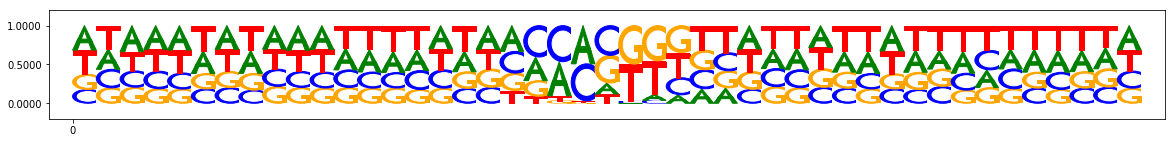

In [81]:
plt.figure(figsize=(20,2))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
viz_sequence.plot_weights_given_ax(ax=plt.gca(),
                                     array=mean_seq_onehot,
                                     height_padding_factor=0.2,
                                     length_padding=1.0,
                                     highlight={},
                                     subticks_frequency=100)
plt.show()

In [0]:
import numpy as np
np.savetxt("neg_motif_score_sequences",seq_strings,fmt='%s')

In [71]:
!cat neg_motif_score_sequences

AGCATCATAGCTATCATCACACATGTCTACTAGTTTCCACGTATG
TTTCCACACCGTACGTGAGCACATGTCTGGATTGCTAGCTGCGTA
TGACCAATTTGATAATTTGGCATGTGCGATCTCTTCGAAAACAGG
GACGATATCACTCTTGAGCGCATGTGCCGTTTCCGAGAACGCCAG
ATCTGCGCCGTTCAGGGGTCCATGTGCCTTGGACGATATTAAGGC
TCAACACACCCGTACACCACCATGTGCGTTATTGAAAAACTCACG
GGTGATATACTCTTTGGTGCACATGCAGGGATGGTTCCGGGAGAC
GTACAGAGCTTAATGCTTTACATGTGCTTTATTTTCGGTACTTTC
CACAGCTGGTGTCTCGTCGCACATGCTATTGTGTGTCATCGGGCC
ATCATTCTGGACGTATGTGCACATGTGATTTGCTTTTGTTTTTTT
ACGGATTTACACTAATTAACACATGGCCAATATAGGTATAAATAA
ACGAATACAGATAGATGGGCACATGGCAAACTTAGCTCAGTATGG
AGCTGAGCCAGAAAATATACCATGTGTGACAATAGCGATAACCTC
GTAGAAACACCAAAATAAGCCATGTGCTTACATAGTGAACATAGT
CGGTACTGTTCTCTGTAATGCATGTGGCCTCTTCCTGAAGTTGCA
TTTTGGAATAGTAGATTAAGCATGTGATAAGTGCCAGTGAAAAAA
TTTTTTTTTTCGTTATGAACCCTGTGCCCGAGGGGTTTTCAGGCA
CATTTGCCACGGCATGTCAACAGGTGAGTGCCTTTTGAGGGGGGG
GCAGCGTGAATGGCACGGCCACATGGGTGGGATTACCCGCGCAGC
TGAAACTTCTAAATCGGCGTCATGTGAAAAACGAGTTAAGGTATC
GCAGCGTGAATGGCACGGCCACATGGGTGGGATTACCCGCGCAGC
AAAGATTGATCTCTATGGGCATATGTTCCTTTCC

In [142]:
print(dset[577].example_idx)

AttributeError: ignored

In [149]:
from google.colab import files

uploaded_msg = files.upload()

Saving pho4model_revcomp_20190703_130PM.h5 to pho4model_revcomp_20190703_130PM.h5


In [151]:
!pip install keras-genomics

  Stored in directory: /root/.cache/pip/wheels/ad/07/53/12c9cab81be5fbb7f824df1cf6d23734f27ce7d52f0675691b
Successfully built keras-genomics


In [152]:
![[ -e seqdataloader ]] && rm -rf seqdataloader
!git clone https://github.com/kundajelab/seqdataloader.git
%cd seqdataloader
!pip uninstall seqdataloader
!pip install .
%cd ..

from seqdataloader.batchproducers import coordbased
from seqdataloader.batchproducers.coordbased import coordstovals
from seqdataloader.batchproducers.coordbased import coordbatchproducers
from seqdataloader.batchproducers.coordbased import coordbatchtransformers

import numpy as np
import gzip
import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

Cloning into 'seqdataloader'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 649 (delta 90), reused 94 (delta 48), pack-reused 508
Receiving objects: 100% (649/649), 3.80 MiB | 32.46 MiB/s, done.
Resolving deltas: 100% (416/416), done.
/content/seqdataloader
Processing /content/seqdataloader
     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 12.5MB 17.6MB/s 
     |████████████████████████████████| 71kB 22.5MB/s 
     |████████████████████████████████| 9.6MB 29.0MB/s 
     |████████████████████████████████| 40kB 14.9MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-wvlwr1d6/wheels/c2/db/13/112d41662f69fb8c7986c218293570cc1550fc21eed966e31b
  Stored in directory: /root/.cache/pip/wheels/de/22/40/f5eb4ef7cb83c890596ce90260a478008adeca4e4138f64430
  Stored in directory: /root/.cache/pip/wheels/4b/62/5b/fcd4580cc7fd70075dc142673a677bed99

In [153]:
!git clone https://github.com/AvantiShri/shap.git
!pip install shap/

Cloning into 'shap'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 4795 (delta 0), reused 3 (delta 0), pack-reused 4789
Receiving objects: 100% (4795/4795), 111.85 MiB | 29.23 MiB/s, done.
Resolving deltas: 100% (3116/3116), done.
Checking out files: 100% (260/260), done.
Processing ./shap
  Stored in directory: /tmp/pip-ephem-wheel-cache-uzgvejpd/wheels/08/fe/b1/461bb216b26aa22db99708d72d320d2f3637775309af9f79b5
Successfully built shap


In [154]:
import keras_genomics
from keras_genomics.layers.convolutional import RevCompConv1D
import keras
import keras.layers as kl
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from seqdataloader.batchproducers import coordbased
from seqdataloader.batchproducers.coordbased import coordstovals
from seqdataloader.batchproducers.coordbased import coordbatchproducers
from seqdataloader.batchproducers.coordbased import coordbatchtransformers
from keras.models import load_model


def multinomial_nll(true_counts, logits):
    """Compute the multinomial negative log-likelihood
    Args:
      true_counts: observed count values
      logits: predicted logit values
    """
    counts_per_example = tf.reduce_sum(true_counts, axis=-1)
    dist = tfp.distributions.Multinomial(total_count=counts_per_example,
                                         logits=logits)
    return (-tf.reduce_sum(dist.log_prob(true_counts)) / 
            tf.to_float(tf.shape(true_counts)[0]))


#from https://github.com/kundajelab/basepair/blob/cda0875571066343cdf90aed031f7c51714d991a/basepair/losses.py#L87
class MultichannelMultinomialNLL(object):
    def __init__(self, n):
        self.__name__ = "MultichannelMultinomialNLL"
        self.n = n

    def __call__(self, true_counts, logits):
        for i in range(self.n):
            loss = multinomial_nll(true_counts[..., i], logits[..., i])
            if i == 0:
                total = loss
            else:
                total += loss
        return total

    def get_config(self):
        return {"n": self.n}
        

from keras.utils import CustomObjectScope

with CustomObjectScope({'MultichannelMultinomialNLL': MultichannelMultinomialNLL,'RevCompConv1D': RevCompConv1D}):
  model = load_model('pho4model_revcomp_20190703_130PM.h5')

W0716 00:12:10.286276 140277809452928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 00:12:10.336312 140277809452928 deprecation.py:323] From <ipython-input-154-e46af472a066>:25: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


In [155]:
model.output

[<tf.Tensor 'task0_logcount/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'task0_profile/add_1:0' shape=(?, 200, 2) dtype=float32>]

In [169]:
!pip install deeplift

  Stored in directory: /root/.cache/pip/wheels/45/10/2d/2076a56f3ec01f021cfede9df40e40963d2c9301e367bde978
Successfully built deeplift


In [175]:
import shap
import tensorflow as tf
from deeplift.dinuc_shuffle import dinuc_shuffle, traverse_edges, shuffle_edges, prepare_edges
from collections import Counter

def combine_mult_and_diffref(mult, orig_inp, bg_data):
    to_return = []
    for l in [0]:
        projected_hypothetical_contribs = np.zeros_like(bg_data[l]).astype("float")
        assert len(orig_inp[l].shape)==2
        #At each position in the input sequence, we iterate over the one-hot encoding
        # possibilities (eg: for genomic sequence, this is ACGT i.e.
        # 1000, 0100, 0010 and 0001) and compute the hypothetical 
        # difference-from-reference in each case. We then multiply the hypothetical
        # differences-from-reference with the multipliers to get the hypothetical contributions.
        #For each of the one-hot encoding possibilities,
        # the hypothetical contributions are then summed across the ACGT axis to estimate
        # the total hypothetical contribution of each position. This per-position hypothetical
        # contribution is then assigned ("projected") onto whichever base was present in the
        # hypothetical sequence.
        #The reason this is a fast estimate of what the importance scores *would* look
        # like if different bases were present in the underlying sequence is that
        # the multipliers are computed once using the original sequence, and are not
        # computed again for each hypothetical sequence.
        for i in range(orig_inp[l].shape[-1]):
            hypothetical_input = np.zeros_like(orig_inp[l]).astype("float")
            hypothetical_input[:,i] = 1.0
            hypothetical_difference_from_reference = (hypothetical_input[None,:,:]-bg_data[l])
            hypothetical_contribs = hypothetical_difference_from_reference*mult[l]
            projected_hypothetical_contribs[:,:,i] = np.sum(hypothetical_contribs,axis=-1) 
        to_return.append(np.mean(projected_hypothetical_contribs,axis=0))
    return to_return[0]
  
def onehot_dinuc_shuffle(s): 
    s = np.squeeze(s)
    argmax_vals = "".join([str(x) for x in np.argmax(s, axis=-1)])
    shuffled_argmax_vals = [int(x) for x in traverse_edges(argmax_vals,                          
                            shuffle_edges(prepare_edges(argmax_vals)))]    
    to_return = np.zeros_like(s)    
    to_return[list(range(len(s))), shuffled_argmax_vals] = 1    
    return to_return

def shuffle_several_times(inp):
    num_shuff=10
    to_return = []
    to_return.append(np.array([onehot_dinuc_shuffle(inp[0]) for i in range(num_shuff)]))
    to_return.append(np.array([inp[1] for i in range(num_shuff)]))
    to_return.append(np.array([inp[2] for i in range(num_shuff)]))
    return to_return
  
explainer = shap.DeepExplainer(
    (model.input, tf.reduce_sum(model.output[0], axis=-1)),
    shuffle_several_times,
    combine_mult_and_diffref=combine_mult_and_diffref)

explainer.shap_values([pho4_onehot[:10], np.zeros((10,1)), np.zeros((10,200,2))])

TypeError: ignored

In [162]:
model.input[0]

<tf.Tensor 'sequence:0' shape=(?, 546, 4) dtype=float32>

In [163]:
model.input[1]

<tf.Tensor 'control_logcount:0' shape=(?, 1) dtype=float32>

In [164]:
model.input[2]

<tf.Tensor 'control_profile:0' shape=(?, 200, 2) dtype=float32>

In [165]:
pho4_onehot.shape

(951, 546, 4)

In [0]:
for entry in dset:
  
  one_hot_to_base()

In [120]:
pho4_onehot[525][157:202]

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [98]:
metacluster_names[1]

'metacluster_1'

Investigate co-enrichment of motifs

In [77]:
import scipy.stats
import h5py

hdf5_results = h5py.File("ISM_logcount_motifs_results1.hdf5","r")

patterns_to_compare = [
    [("metacluster_1", "pattern_0"), ("metacluster_1", "pattern_2")],
    [("metacluster_0", "pattern_0"), ("metacluster_1", "pattern_1")]
]

for ((pattern1_metacluster, pattern1_name),
     (pattern2_metacluster, pattern2_name)) in patterns_to_compare:
    
    print("Comparing "+pattern1_metacluster+"_"+pattern1_name
          +" and "+pattern2_metacluster+"_"+pattern2_name)
    
    pattern1_seqlets = list(hdf5_results["metacluster_idx_to_submetacluster_results"]\
                                             [pattern1_metacluster]["seqlets_to_patterns_result"]\
                                             ["patterns"][pattern1_name]["seqlets_and_alnmts"]["seqlets"])
    pattern1_example_idxs = set([
        x.decode("utf-8").split(",")[0].split(":")[1] for x in
        pattern1_seqlets])

    pattern2_seqlets = list(hdf5_results["metacluster_idx_to_submetacluster_results"]\
                                         [pattern2_metacluster]["seqlets_to_patterns_result"]\
                                         ["patterns"][pattern2_name]["seqlets_and_alnmts"]["seqlets"])
    pattern2_example_idxs = set([
        x.decode("utf-8").split(",")[0].split(":")[1] for x in
        pattern2_seqlets])

    for (comparison_pattern_metacluster,
         comparison_pattern_name) in all_patterns:
        
        if ((comparison_pattern_metacluster+"_"+comparison_pattern_name
             != pattern1_metacluster+"_"+pattern1_name)
            and (comparison_pattern_metacluster+"_"+comparison_pattern_name
             != pattern2_metacluster+"_"+pattern2_name)):
            
            comparison_pattern_seqlets = list(
                hdf5_results["metacluster_idx_to_submetacluster_results"]\
                [comparison_pattern_metacluster]["seqlets_to_patterns_result"]\
                ["patterns"][comparison_pattern_name]["seqlets_and_alnmts"]["seqlets"])
            comparison_pattern_example_idxs = set([
                x.decode("utf-8").split(",")[0].split(":")[1] for x in
                comparison_pattern_seqlets])
        
            
            pattern1_overlap = len(pattern1_example_idxs.intersection(
                                    comparison_pattern_example_idxs))
            pattern2_overlap = len(pattern2_example_idxs.intersection(
                                    comparison_pattern_example_idxs))
            
            contingency_table = np.array([
                [pattern1_overlap, len(pattern1_example_idxs)-pattern1_overlap],
                [pattern2_overlap, len(pattern2_example_idxs)-pattern2_overlap]])
            odds_ratio, p_value = scipy.stats.fisher_exact(contingency_table)
            print("Looking at enrichment for "+comparison_pattern_metacluster
                                          +"_"+comparison_pattern_name)
            print("Odds ratio:",odds_ratio,
                  "P-value:",p_value)

            
hdf5_results.close()

Comparing metacluster_1_pattern_0 and metacluster_1_pattern_2
Looking at enrichment for metacluster_0_pattern_0
Odds ratio: 2.3322072072072073 P-value: 0.11915812841370008
Looking at enrichment for metacluster_1_pattern_1
Odds ratio: 2.7916666666666665 P-value: 0.2220089142844768
Comparing metacluster_0_pattern_0 and metacluster_1_pattern_1
Looking at enrichment for metacluster_1_pattern_0
Odds ratio: 1.5412411626080125 P-value: 0.26928305250423834
Looking at enrichment for metacluster_1_pattern_2
Odds ratio: 1.3387096774193548 P-value: 1.0
